In [1]:
!pip install -U transformers datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.8/494.8 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.7.0
    Uninstalling fsspec-2025.7.0:
      Successfully uninstalled fsspec-2025.7.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.53.2
    Uninstalling transformers-4.53.2:
      Successfully uninstalled transformers-4.53.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are in

## Local Inference on GPU
Model page: https://huggingface.co/distilbert/distilbert-base-uncased

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/distilbert/distilbert-base-uncased)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("fill-mask", model="distilbert/distilbert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [3]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("distilbert/distilbert-base-uncased")

## Remote Inference via Inference Providers
Ensure you have a valid **HF_TOKEN** set in your environment, running this may bill your account above the free tier.
The following Python example shows how to run the model remotely on HF Inference Providers, using the **auto** provider setting (automatically selects an available inference provider).

In [4]:
import pandas as pd

df0 = pd.read_parquet("hf://datasets/sdiazlor/text-classification-news-topics/generate_text_classification_data_0/train-00000-of-00001.parquet")
df1 = pd.read_parquet("hf://datasets/sdiazlor/text-classification-news-topics/generate_text_classification_data_1/train-00000-of-00001.parquet")
df2 = pd.read_parquet("hf://datasets/sdiazlor/text-classification-news-topics/generate_text_classification_data_2/train-00000-of-00001.parquet")

df = pd.concat([df0, df1, df2], ignore_index=True)


In [5]:
df.head()

,task,input_text,label,misleading_label,distilabel_metadata,model_name
0,"Determine the news article as sports, business",The recent surge in cryptocurrency prices has ...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct
1,"Determine the news article as sports, business",The recent surge in the price of crude oil has...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct
2,"Determine the news article as sports, business",The recent surge in cryptocurrency prices has ...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct
3,"Determine the news article as sports, business",The New York Knicks' struggles on the court ha...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct
4,"Determine the news article as sports, business",The New York Knicks' recent acquisition of sta...,sports,business,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct


In [6]:
df.isnull()

,task,input_text,label,misleading_label,distilabel_metadata,model_name
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1195,False,False,False,False,False,False
1196,False,False,False,False,False,False
1197,False,False,False,False,False,False
1198,False,False,False,False,False,False


In [7]:
df.isnull().sum()

,0
task,0
input_text,3
label,3
misleading_label,3
distilabel_metadata,0
model_name,0


In [8]:
df.dropna(subset=["input_text", "label"])

,task,input_text,label,misleading_label,distilabel_metadata,model_name
0,"Determine the news article as sports, business",The recent surge in cryptocurrency prices has ...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct
1,"Determine the news article as sports, business",The recent surge in the price of crude oil has...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct
2,"Determine the news article as sports, business",The recent surge in cryptocurrency prices has ...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct
3,"Determine the news article as sports, business",The New York Knicks' struggles on the court ha...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct
4,"Determine the news article as sports, business",The New York Knicks' recent acquisition of sta...,sports,business,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct
...,...,...,...,...,...,...
1195,Recognize the topic of the news article as Fac...,The recent study published in the Journal of E...,Fact-based,Opinion-based,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct
1196,Recognize the topic of the news article as Fac...,The report by the World Health Organization su...,Fact-based,Opinion-based,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct
1197,Recognize the topic of the news article as Fac...,The recent surge in global demand for renewabl...,Fact-based,Opinion-based,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct
1198,Recognize the topic of the news article as Fac...,The recent study on the efficacy of renewable ...,Opinion-based,Fact-based,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct


In [9]:
print(df["label"].value_counts())

label
sci/tech              383
business              267
world                 193
Fact-based            129
Opinion-based         111
sports                 76
sci                    30
Business                7
science_technology      1
Name: count, dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["label_id"] = le.fit_transform(df["label"])
label2id = dict(zip(le.classes_, le.transform(le.classes_)))
id2label = {v: k for k, v in label2id.items()}

In [11]:
df.head()

,task,input_text,label,misleading_label,distilabel_metadata,model_name,label_id
0,"Determine the news article as sports, business",The recent surge in cryptocurrency prices has ...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,3
1,"Determine the news article as sports, business",The recent surge in the price of crude oil has...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,3
2,"Determine the news article as sports, business",The recent surge in cryptocurrency prices has ...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,3
3,"Determine the news article as sports, business",The New York Knicks' struggles on the court ha...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,3
4,"Determine the news article as sports, business",The New York Knicks' recent acquisition of sta...,sports,business,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,7


In [12]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [13]:
from datasets import Dataset, Features, Value, ClassLabel
df["input_text"] = df["input_text"].astype(str)
df["label"] = df["label_id"]

features = Features({
    "input_text": Value("string"),
    "label": ClassLabel(num_classes=len(df["label"].unique()))
})

In [14]:

dataset = Dataset.from_pandas(df[["input_text", "label"]], features=features)


In [15]:
def tokenize_function(examples):
    return tokenizer(
        examples["input_text"],
        padding="max_length",
        truncation=True,
        max_length=256,
    )

tokenized_dataset = dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

In [16]:
from datasets import DatasetDict

split_dataset = tokenized_dataset.train_test_split(test_size=0.2)

In [17]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np

In [18]:
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=len(set(df["label"]))
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
from sklearn.metrics import accuracy_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {"accuracy": accuracy_score(labels, predictions)}

In [20]:
from transformers import TrainingArguments


In [21]:
import transformers
print(transformers.__version__)

4.53.3


In [29]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')

    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

In [37]:
 from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=16,
    num_train_epochs=3,
    learning_rate=2e-5,
    logging_steps=10,
    logging_dir="./logs",
    report_to="none"
)

In [38]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=split_dataset["train"],
    eval_dataset=split_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()


/tmp/ipython-input-38-3824297576.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,0.892400
20,0.872200
30,0.719800
40,0.736000
50,0.782400
60,0.800800
70,0.682800
80,0.573900
90,0.657300
100,0.645100


TrainOutput(global_step=180, training_loss=0.6588095267613728, metrics={'train_runtime': 3689.9333, 'train_samples_per_second': 0.781, 'train_steps_per_second': 0.049, 'total_flos': 190780268544000.0, 'train_loss': 0.6588095267613728, 'epoch': 3.0})

In [39]:
trainer.evaluate()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'eval_loss': 0.6470234394073486,
 'eval_accuracy': 0.7791666666666667,
 'eval_precision': 0.7431502331109198,
 'eval_recall': 0.7791666666666667,
 'eval_f1': 0.7535915823884096,
 'eval_runtime': 89.6673,
 'eval_samples_per_second': 2.677,
 'eval_steps_per_second': 0.335,
 'epoch': 3.0}

In [40]:
from sklearn.metrics import classification_report

preds_output = trainer.predict(split_dataset["test"])
preds = preds_output.predictions.argmax(-1)
labels = preds_output.label_ids

print(classification_report(labels, preds))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.63      0.87      0.73        30
           2       0.62      0.35      0.44        23
           3       0.75      0.78      0.77        46
           4       0.00      0.00      0.00         8
           5       0.89      0.97      0.93        77
           7       0.79      1.00      0.88        15
           8       0.77      0.69      0.73        39
           9       0.00      0.00      0.00         1

    accuracy                           0.78       240
   macro avg       0.49      0.52      0.50       240
weighted avg       0.74      0.78      0.75       240



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


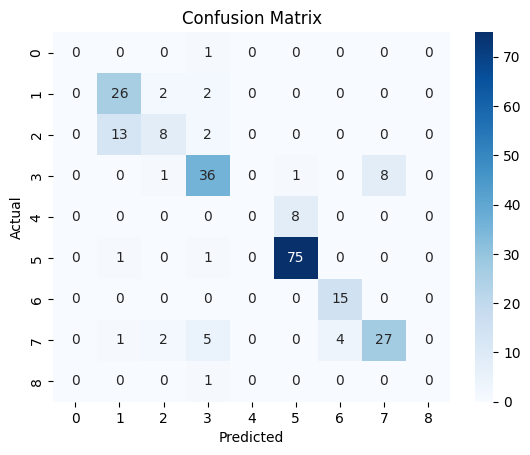

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(labels, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()